In [1]:
!pip install pandas==2.0.2 scikit-learn==1.3.2 joblib==1.3.2

  Using cached pandas-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
train_df_raw = pd.read_csv('/content/train.csv')


In [254]:
test_df_raw = pd.read_csv('/content/test.csv')

In [255]:
train_df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
test_df_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [257]:
# Convert 'Pclass' to object type
train_df_raw['Pclass'] = train_df_raw['Pclass'].astype(str)
test_df_raw['Pclass'] = test_df_raw['Pclass'].astype(str)

In [258]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [259]:
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 36.0+ KB


In [260]:
df = train_df_raw.drop('Ticket', axis=1)
test_df = test_df_raw.drop('Ticket', axis=1)

In [261]:
combine = [df, test_df]

In [262]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [263]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [265]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]

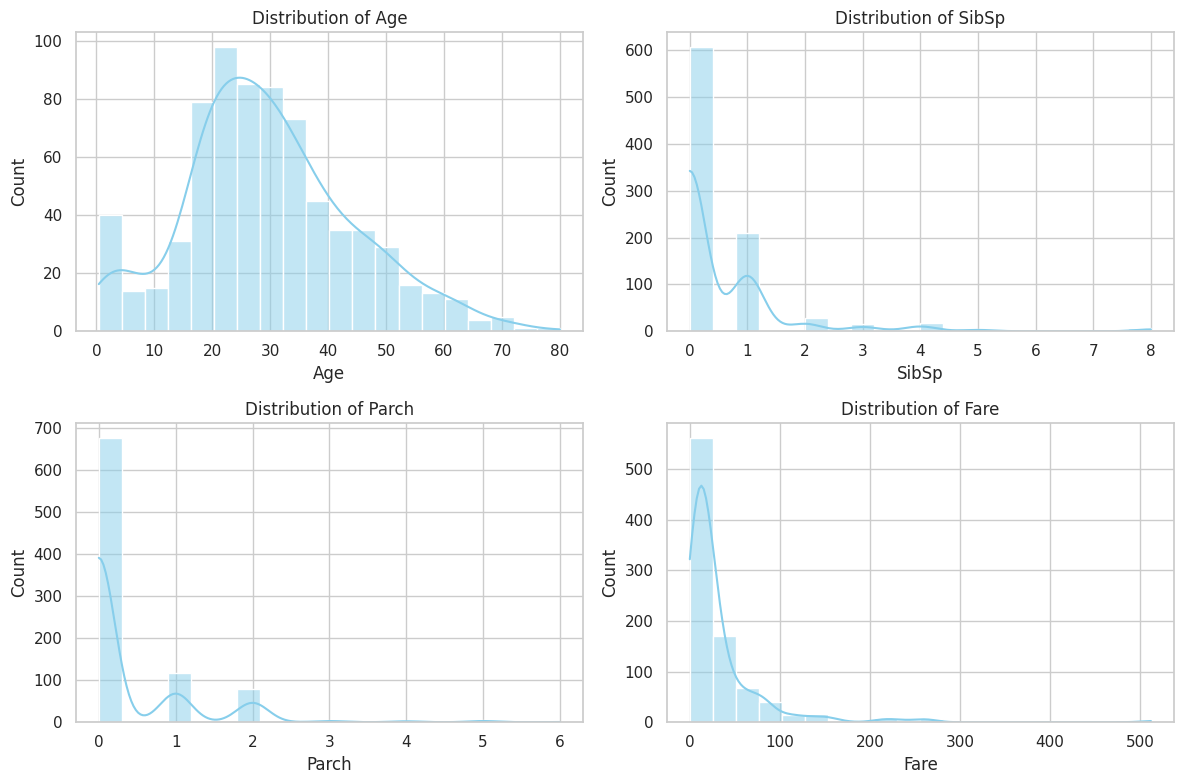

In [266]:

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Use a for loop to create distribution plots for each column
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], kde=True, bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

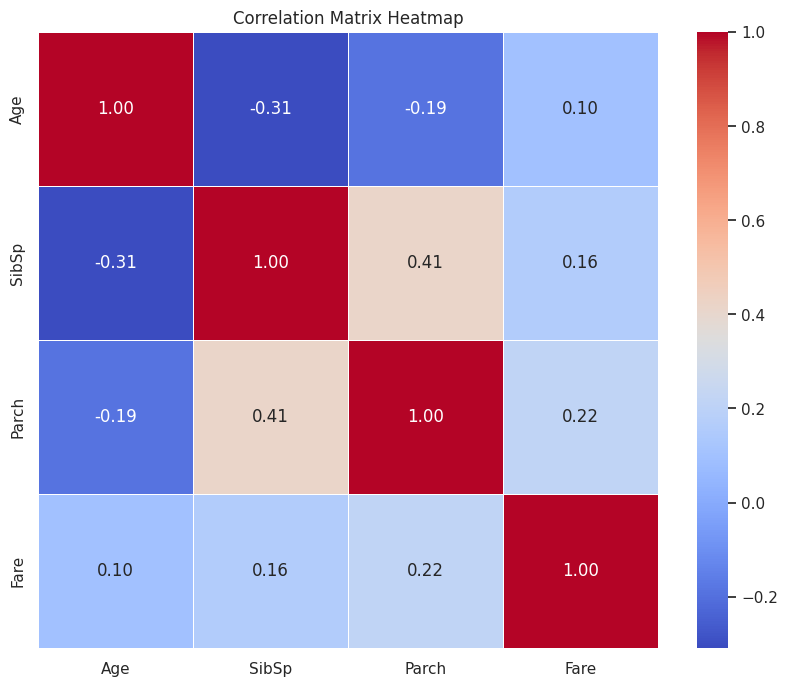

In [267]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Percentage Survived Breakdown (By Sex)

In [268]:
# Use groupby and value_counts to calculate absolute counts
result = df.groupby('Sex')['Survived'].value_counts().unstack()

# Display the result
print(result)


Survived    0    1
Sex               
female     81  233
male      468  109


In [269]:
# Use groupby and value_counts to calculate percentages
result = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

# Display the result
print(result)

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


###Percentage Survived Breakdown (By Class)




In [270]:
# Use groupby and value_counts to calculate absolute counts
result = df.groupby('Pclass')['Survived'].value_counts().unstack()

# Display the result
print(result)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [271]:
# Use groupby and value_counts to calculate percentages
result = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100

# Display the result
print(result)

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


###Percentage Survived Breakdown (By Siblings & Spouses)


In [272]:
# Use groupby and value_counts to calculate absolute counts
result = df.groupby('SibSp')['Survived'].value_counts().unstack()

# Display the result
print(result)

Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


In [273]:
# Use groupby and value_counts to calculate percentages
result = df.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

# Display the result
print(result)

Survived           0          1
SibSp                          
0          65.460526  34.539474
1          46.411483  53.588517
2          53.571429  46.428571
3          75.000000  25.000000
4          83.333333  16.666667
5         100.000000        NaN
8         100.000000        NaN


###Percentage Survived Breakdown (By Parents & Children)

In [274]:
# Use groupby and value_counts to calculate absolute counts
result = df.groupby('Parch')['Survived'].value_counts().unstack()

# Display the result
print(result)

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


In [275]:
# Use groupby and value_counts to calculate percentages
result = df.groupby('Parch')['Survived'].value_counts(normalize=True).unstack() * 100

# Display the result
print(result)

Survived           0          1
Parch                          
0          65.634218  34.365782
1          44.915254  55.084746
2          50.000000  50.000000
3          40.000000  60.000000
4         100.000000        NaN
5          80.000000  20.000000
6         100.000000        NaN


###Percentage Survived Breakdown(By Cabin)

In [276]:
# Extract the letter from the 'Cabin' column and impute null values with 'n'
df['CabinLetter'] = df['Cabin'].str.extract('([A-Za-z])').fillna('n')

# Display the count of each letter
letter_counts = df['CabinLetter'].value_counts()

# Display the result
print(letter_counts)

# Iterate through the combined dataframes
for dataset in combine:
    # Extract the letter from the 'Cabin' column and impute null values with 'n'
    dataset['CabinLetter'] = dataset['Cabin'].str.extract('([A-Za-z])').fillna('n')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLetter, dtype: int64


In [277]:
# Extract the letter from the 'Cabin' column and impute null values with 'n'
df['CabinLetter'] = df['Cabin'].str.extract('([A-Za-z])').fillna('n')

# Group by 'CabinLetter' and count the occurrences of 1s and 0s in 'Survived'
survival_breakdown = df.groupby(['CabinLetter', 'Survived']).size().unstack()

# Display the result
print(survival_breakdown)

Survived         0      1
CabinLetter              
A              8.0    7.0
B             12.0   35.0
C             24.0   35.0
D              8.0   25.0
E              8.0   24.0
F              5.0    8.0
G              2.0    2.0
T              1.0    NaN
n            481.0  206.0


###Title & Survival Chance


In [278]:
# Extract titles using regular expressions
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

# Display the count of each title
title_counts = df['Title'].value_counts()

# Display the result
print(title_counts)

# Iterate through the combined dataframes
for dataset in combine:
    # Extract titles using regular expressions
    dataset['Title'] = dataset['Name'].str.extract(r',\s*([^\.]+)\.')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [279]:
# Extract titles using regular expressions
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

# Extract cabin letters and impute null values with 'n'
df['CabinLetter'] = df['Cabin'].str.extract('([A-Za-z])').fillna('n')

df = df.drop(['Name', 'Cabin'], axis=1)


In [280]:
for dataset in combine:
    # Extract titles using regular expressions
    dataset['Title'] = dataset['Name'].str.extract(r',\s*([^\.]+)\.')

    # Extract cabin letters and impute null values with 'n'
    dataset['CabinLetter'] = dataset['Cabin'].str.extract('([A-Za-z])').fillna('n')

    # Drop unnecessary columns
    dataset.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [281]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,Title
0,1,0,3,male,22.0,1,0,7.2500,S,n,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,n,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,n,Mr
5,6,0,3,male,NaN,0,0,8.4583,Q,n,Mr
6,7,0,1,male,54.0,0,0,51.8625,S,E,Mr
7,8,0,3,male,2.0,3,1,21.0750,S,n,Master
8,9,1,3,female,27.0,0,2,11.1333,S,n,Mrs
9,10,1,2,female,14.0,1,0,30.0708,C,n,Mrs


In [282]:
# Calculate survival percentage for each title
survival_percentage_by_title = df.groupby('Title')['Survived'].mean() * 100

# Display the result
print(survival_percentage_by_title)

Title
Capt              0.000000
Col              50.000000
Don               0.000000
Dr               42.857143
Jonkheer          0.000000
Lady            100.000000
Major            50.000000
Master           57.500000
Miss             69.780220
Mlle            100.000000
Mme             100.000000
Mr               15.667311
Mrs              79.200000
Ms              100.000000
Rev               0.000000
Sir             100.000000
the Countess    100.000000
Name: Survived, dtype: float64


In [283]:
# Display 0 and 1 counts from the 'Survived' column grouped by title
survival_counts_by_title = df.groupby(['Title', 'Survived']).size().unstack(fill_value=0)

# Display the result
print(survival_counts_by_title)

Survived        0    1
Title                 
Capt            1    0
Col             1    1
Don             1    0
Dr              4    3
Jonkheer        1    0
Lady            0    1
Major           1    1
Master         17   23
Miss           55  127
Mlle            0    2
Mme             0    1
Mr            436   81
Mrs            26   99
Ms              0    1
Rev             6    0
Sir             0    1
the Countess    0    1


###Survival rate correlated with each categorical variable


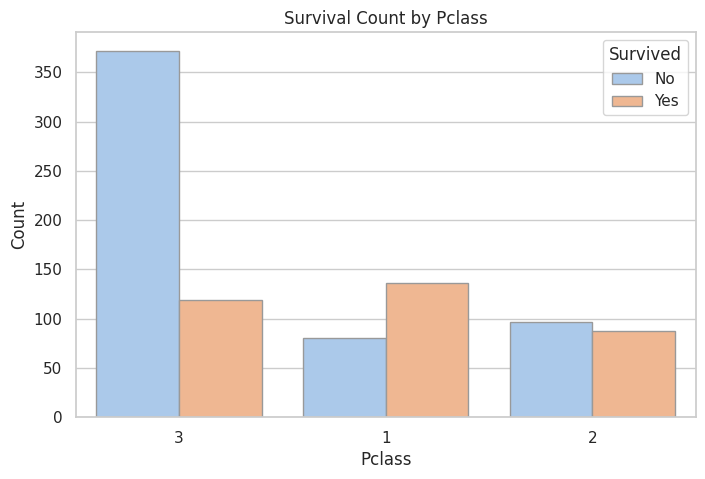

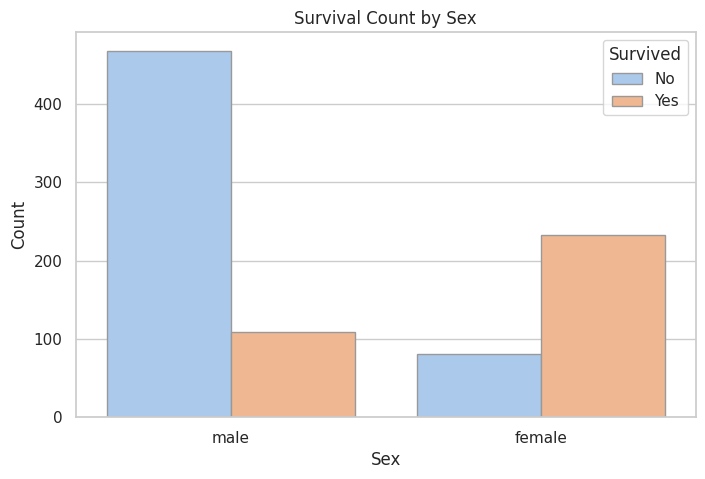

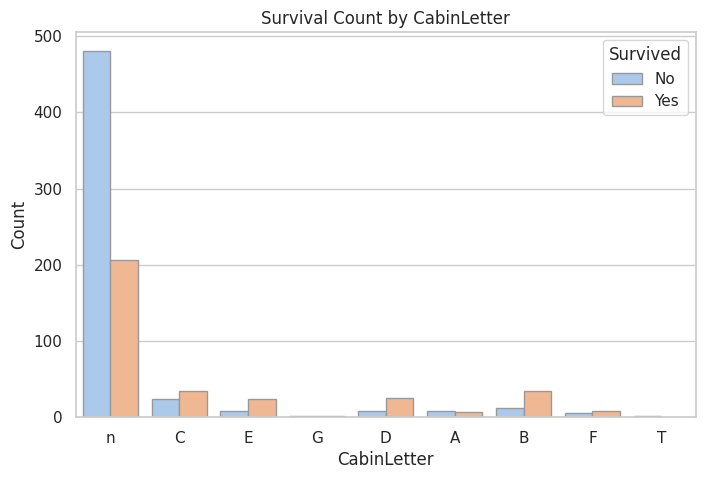

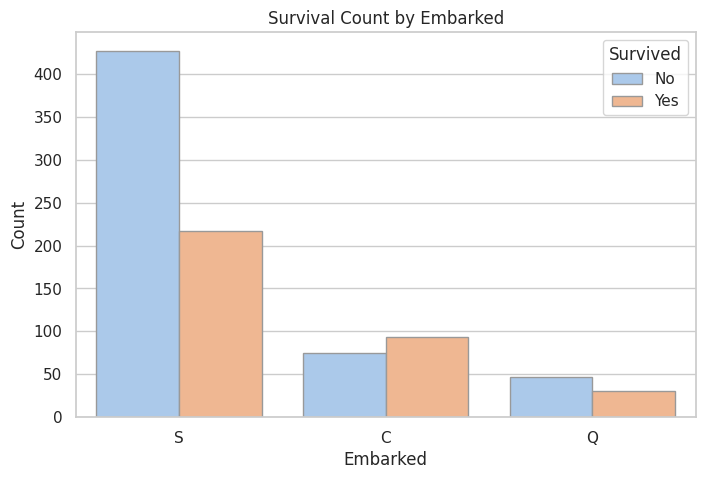

In [284]:
# Select categorical columns
df_cat = df[['Survived', 'Pclass', 'Sex', 'CabinLetter', 'Embarked']]

# Set up the seaborn style
sns.set(style="whitegrid")

# Create plots for each categorical variable grouped by 'Survived'
for column in df_cat.columns[1:]:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Survived', data=df_cat, palette='pastel', edgecolor=".6")
    plt.title(f'Survival Count by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
    plt.show()

###Imputing Missing Values

In [285]:
#Using median for each title

# Calculate median age for each title
median_age_by_title = df.groupby('Title')['Age'].median()
print (median_age_by_title)

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [286]:

# Impute missing values in 'Age' column with the median corresponding to each title
df['Age'] = df.apply(lambda row: median_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# Display the DataFrame with imputed values
print(df)

     PassengerId  Survived Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0      3    male  22.0      1      0   7.2500   
1              2         1      1  female  38.0      1      0  71.2833   
2              3         1      3  female  26.0      0      0   7.9250   
3              4         1      1  female  35.0      1      0  53.1000   
4              5         0      3    male  35.0      0      0   8.0500   
..           ...       ...    ...     ...   ...    ...    ...      ...   
886          887         0      2    male  27.0      0      0  13.0000   
887          888         1      1  female  19.0      0      0  30.0000   
888          889         0      3  female  21.0      1      2  23.4500   
889          890         1      1    male  26.0      0      0  30.0000   
890          891         0      3    male  32.0      0      0   7.7500   

    Embarked CabinLetter Title  
0          S           n    Mr  
1          C           C   Mrs  
2          S

In [287]:
# Iterate through the combined dataframes
for dataset in combine:
    # Calculate median age for each title
    median_age_by_title = dataset.groupby('Title')['Age'].median()

    # Impute missing values in 'Age' column with the median corresponding to each title
    dataset['Age'] = dataset.apply(lambda row: median_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)


In [53]:
#Using mean for each title

# Calculate mean age for each title
mean_age_by_title = df.groupby('Title')['Age'].mean()
print (mean_age_by_title)

Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.642857
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.466750
Miss            21.620879
Mlle            24.000000
Mme             24.000000
Mr              31.823017
Mrs             35.776000
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [54]:
# Impute missing values in 'Age' column with the mean corresponding to each title
df['Age'] = df.apply(lambda row: mean_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# Display the DataFrame with imputed values
print(df)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  21.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked CabinLetter Title  
0          S           n    Mr  
1          C           C   Mrs  


In [110]:
# Iterate through the combined dataframes
for dataset in combine:
    # Calculate mean age for each title
    mean_age_by_title = dataset.groupby('Title')['Age'].mean()

    # Impute missing values in 'Age' column with the mean corresponding to each title
    dataset['Age'] = dataset.apply(lambda row: mean_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   CabinLetter  891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [289]:
# Drop rows with null values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   CabinLetter  889 non-null    object 
 10  Title        889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [290]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   CabinLetter  418 non-null    object 
 9   Title        418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [292]:

shallow_copy_df = test_df.copy()

In [293]:
# Assuming 'test_df' is already defined
rows_with_null_values = shallow_copy_df[shallow_copy_df.isnull().any(axis=1)]

# Display the rows with null values
print(rows_with_null_values)


     PassengerId Pclass     Sex   Age  SibSp  Parch  Fare Embarked  \
88           980      3  female   NaN      0      0  7.75        Q   
152         1044      3    male  60.5      0      0   NaN        S   

    CabinLetter Title  
88            n    Ms  
152           n    Mr  


In [294]:
# Assuming 'test_df' is already defined
# Calculate median age for each combination of 'Sex' and 'Pclass'
median_age_by_sex_pclass = test_df.groupby(['Sex', 'Pclass'])['Age'].median()

# Calculate median fare for each combination of 'Pclass' and 'Embarked'
median_fare_by_pclass_embarked = test_df.groupby(['Pclass', 'Embarked'])['Fare'].median()

# Create a boolean mask for rows with missing values in 'Age'
missing_age_mask = test_df['Age'].isnull()

# Fill missing values in 'Age' with the median corresponding to 'Sex' and 'Pclass'
test_df.loc[missing_age_mask, 'Age'] = test_df.loc[missing_age_mask].apply(
    lambda row: median_age_by_sex_pclass.loc[row['Sex'], row['Pclass']],
    axis=1
)

# Create a boolean mask for rows with missing values in 'Fare'
missing_fare_mask = test_df['Fare'].isnull()

# Fill missing values in 'Fare' with the median corresponding to 'Pclass' and 'Embarked'
test_df.loc[missing_fare_mask, 'Fare'] = test_df.loc[missing_fare_mask].apply(
    lambda row: median_fare_by_pclass_embarked.loc[row['Pclass'], row['Embarked']],
    axis=1
)

# Display the rows that have been filled
filled_rows = test_df.loc[missing_age_mask | missing_fare_mask]
print(filled_rows)





     PassengerId Pclass     Sex   Age  SibSp  Parch  Fare Embarked  \
88           980      3  female  22.0      0      0  7.75        Q   
152         1044      3    male  60.5      0      0  8.05        S   

    CabinLetter Title  
88            n    Ms  
152           n    Mr  


In [295]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   CabinLetter  418 non-null    object 
 9   Title        418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


###Model creation

###Logistic Regression

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [297]:
# Separate features and target variable
X = df[['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'CabinLetter']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
# Separate features from test_df
X_test_df = test_df[['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'CabinLetter']]

In [300]:
#Without using Cabin and Fare
# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression model
log_model1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Train the model
log_model1.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.797752808988764


In [301]:
#Using Cabin and Fare
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex', 'CabinLetter']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression model
log_model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Train the model
log_model2.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7865168539325843


###Decision Tree

In [302]:
#Without Using Cabin and Fare

from sklearn.tree import DecisionTreeClassifier
# Separate features and target variable
X = df[['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'CabinLetter']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Pclass', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a decision tree model
DT_model1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model
DT_model1.fit(X_train, y_train)

# Predict on the test set
y_pred = DT_model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8033707865168539


In [303]:
#Using Cabin and Fare

from sklearn.tree import DecisionTreeClassifier
# Separate features and target variable
X = df[['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'CabinLetter']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Pclass', 'Sex', 'CabinLetter']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a decision tree model
DT_model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model
DT_model2.fit(X_train, y_train)

# Predict on the test set
y_pred = DT_model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7247191011235955


###Support Vector Classifier

In [304]:
#Without Using Cabin and Fare
from sklearn.svm import SVC

# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Pclass', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SVC model
SVC_model1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(random_state=42))])

# Train the model
SVC_model1.fit(X_train, y_train)

# Predict on the test set
y_pred = SVC_model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8089887640449438


In [305]:
#Using Cabin and Fare
from sklearn.svm import SVC

# Create a preprocessing pipeline for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch','Fare']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Pclass', 'Sex','CabinLetter']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SVC model
SVC_model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(random_state=42))])

# Train the model
SVC_model2.fit(X_train, y_train)

# Predict on the test set
y_pred = SVC_model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8258426966292135


#Prediction on Test Data

In [308]:
#Logistic Regression Prediction on Test Data

# Predict on the test set
y_pred_test_df_log1 = log_model1.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_log1)

Predictions for test_df:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [309]:
y_pred_test_df_log2 = log_model2.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_log2)

Predictions for test_df:
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0]


In [310]:
#Decision Tree Prediction on Test Data

# Predict on the test set
y_pred_test_df_DT1 = DT_model1.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_DT1)

Predictions for test_df:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [311]:
# Predict on the test set
y_pred_test_df_DT2 = DT_model2.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_DT2)

Predictions for test_df:
[0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [312]:
#SVC Prediction on Test Data

# Predict on the test set
y_pred_test_df_SVC1 = SVC_model1.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_SVC1)

Predictions for test_df:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [313]:
#SVC Prediction on Test Data

# Predict on the test set
y_pred_test_df_SVC2 = SVC_model2.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_SVC2)

Predictions for test_df:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [318]:
from sklearn.ensemble import VotingClassifier
# Set probability=True for classifiers that support it
SVC_model1.probability = True
log_model1.probability = True

# Create a hard voting classifier
voting_clf1 = VotingClassifier(
    estimators=[
        ('svc', SVC_model1),
        ('logistic', log_model1),
        ('decision_tree', DT_model1)
    ],
    voting='hard'  # Use 'hard' for hard voting
)

# Fit the hard voting classifier on the training data
voting_clf1.fit(X_train, y_train)

# Predict on the training set
y_pred_train = voting_clf1.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Training Set: {accuracy_train}")

Accuracy on Training Set: 0.8452883263009845


In [319]:
from sklearn.ensemble import VotingClassifier
# Set probability=True for classifiers that support it
SVC_model2.probability = True
log_model2.probability = True

# Create a hard voting classifier
voting_clf2 = VotingClassifier(
    estimators=[
        ('svc', SVC_model2),
        ('logistic', log_model2),
        ('decision_tree', DT_model2)
    ],
    voting='hard'  # Use 'hard' for hard voting
)

# Fit the hard voting classifier on the training data
voting_clf2.fit(X_train, y_train)

# Predict on the training set
y_pred_train = voting_clf2.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Training Set: {accuracy_train}")

Accuracy on Training Set: 0.8607594936708861


In [320]:
#Voting classifier prediction on test data
y_pred_test_df_clf1 = voting_clf1.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_clf1)

Predictions for test_df:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [321]:
#Voting classifier prediction on test data
y_pred_test_df_clf2 = voting_clf2.predict(X_test_df)

# Display the predictions
print("Predictions for test_df:")
print(y_pred_test_df_clf2)

Predictions for test_df:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [325]:

# Assuming 'y_pred_test_df_clf1' and 'test_df' are already defined
from google.colab import files

# Create a DataFrame with PassengerId and the corresponding predictions
result_df_clf1 = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_test_df_clf1})

# Save the DataFrame to a CSV file
result_df_clf1.to_csv('predictions.csv', index=False)

# Download the CSV file
files.download('predictions.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [327]:
# Assuming 'y_pred_test_df_clf1' and 'test_df' are already defined
from google.colab import files

# Create a DataFrame with PassengerId and the corresponding predictions
result_df_clf2 = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_test_df_clf2})

# Save the DataFrame to a CSV file
result_df_clf2.to_csv('predictions2.csv', index=False)

# Download the CSV file
files.download('predictions2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>